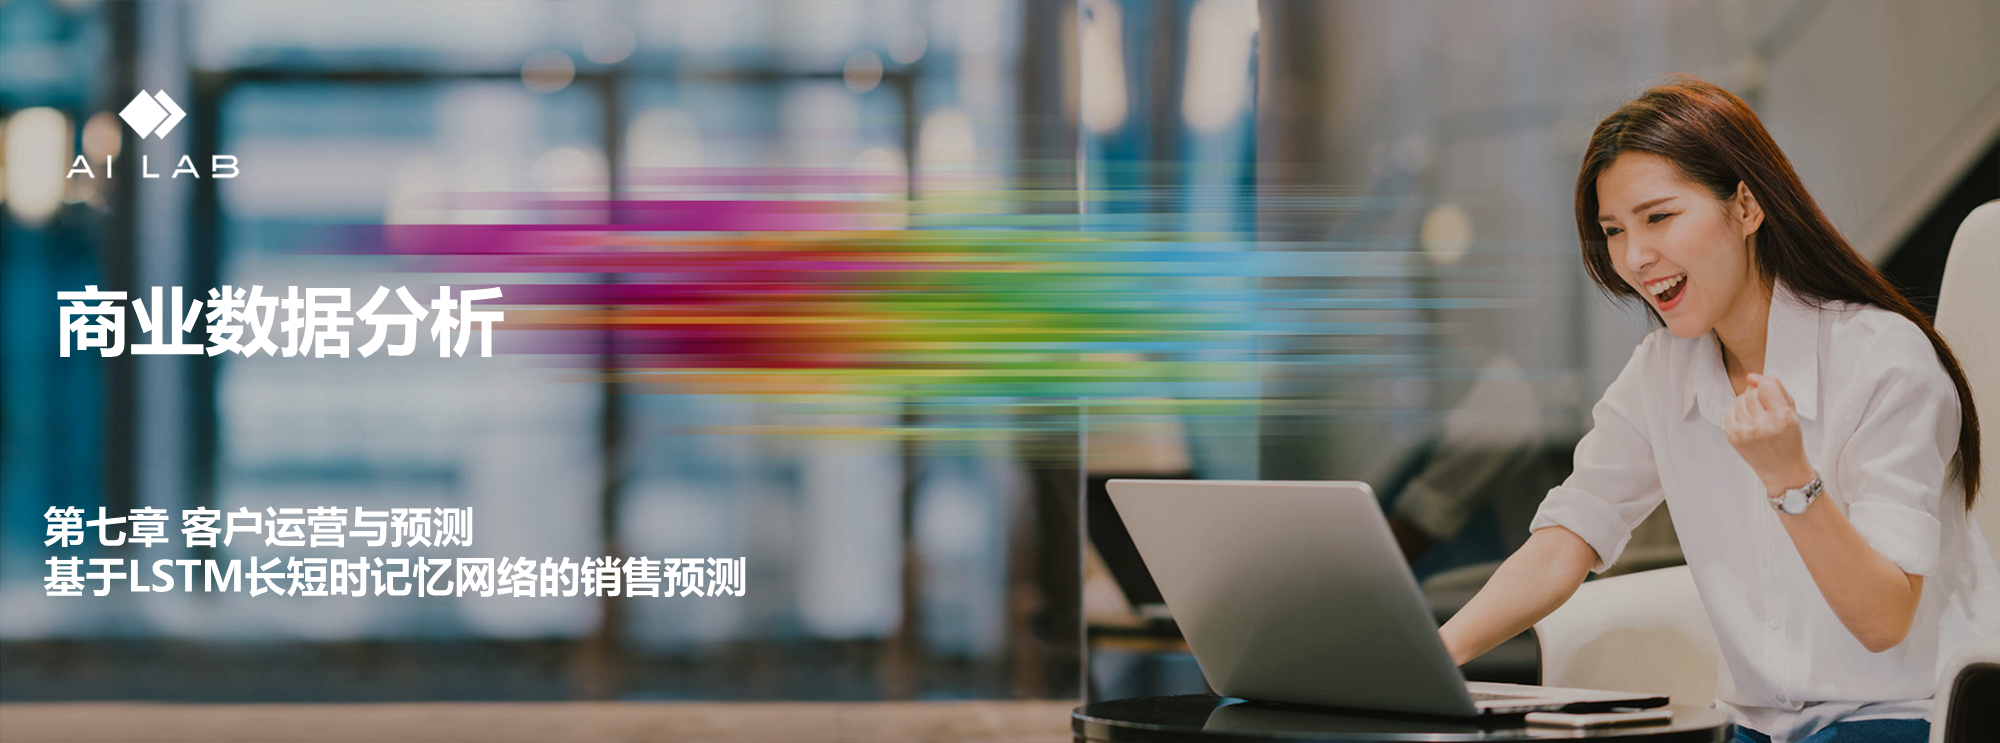

LSTM(Long Short Term Memory Network)长短时记忆网络，是一种改进之后的循环神经网络，可以解决 RNN 无法处理长距离的依赖的问题，在时间序列预测问题上面也有广泛的应用。

# LSTM 模型结构

根据问题的输入输出模式划分， LSTM 时间序列分析的模型结构主要有以下六种结构：


##  Univariate

Univariate 是指：input 为多个时间步，output 为一个时间的问题。这个是最基本的模型结构，我们后面几种模型会和这个进行比较。

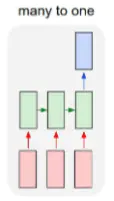

In [1]:
from keras.models import Sequential #引入Kears模块的序列模型，此模型是将所有层线性叠加；
from keras.layers import Dense #输出层，使用全连接层;
from keras.layers import LSTM #引入LSTM层;

In [2]:
train_X=np.array([[10],[20],[30],[40],[50],[60]])
train_y=np.array([[20],[30],[40],[50],[60],[70]])
pred_X=np.array([[[70]],[[80]],[[90]]])



#n_steps 为输入的 X 每次考虑几个时间步
n_steps = 3

#n_features 为每个时间步的序列数
n_features = 1

X_train = np.reshape(train_X, (train_X.shape[0],n_features,train_X.shape[1]))
y_train = np.reshape(train_y, (train_y.shape[0],n_features,train_y.shape[1]))
X_train

NameError: name 'np' is not defined

In [ ]:
# 模型的 Keras 代码：

model = Sequential()
model.add(LSTM(50,  activation='relu',  input_shape = (n_steps,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train,
          epochs=50, batch_size=1)


In [ ]:
predict_test = model.predict(pred_X)
predict_test

## Multiple Input

Multiple Input 是指：input 为多个序列，output 为一个序列的问题。

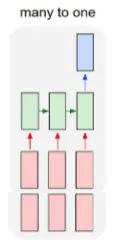

In [ ]:
# train_X=np.array([[[10,15], [20,25] ,[30,35]],
#                   [[20,25],[30,35],[40,45]],
#                   [[30,35],[40,45],[50,55]],
#                   [[40,45],[50,55],[60,65]]])
# train_y=np.array([[65],[85],[105],[125]])

# pred_X=np.array([[80,85],[90,95],[100,105]])


'''
原始数据样式为：

in_seq1=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2=np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])

out_seq： [in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))]
'''

train_X=np.array([[10,15],[20,25],[30,35],[40,45],[50,55],[60,65],[70,75],[80,85],[90,95]])
train_y=np.array([[65],[85],[105],[125]])

pred_X=np.array([[80,85],[90,95],[100,105]])
train_X.shape

In [ ]:
n_steps = 3
n_features = train_X.shape[1] 
n_features


X_train = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
X_train

In [ ]:
#模型的 Keras 代码：
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train,
          epochs=50, batch_size=1)

此例中 n features = 2，因为输入有两个并行序列

其中：

n_steps 为输入的 X 每次考虑几个时间步
n_features 此例中 = 2，因为输入有两个并行序列

**和 Univariate 相比：模型的结构代码是一样的，只是在 n_features = X.shape[2]，而不是 1.**

## Multiple Parallel

Multiple Parallel 是指：input 为多个序列，output 也是多个序列的问题。

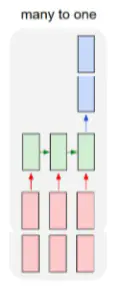

其中：

n_steps 为输入的 X 每次考虑几个时间步

n_features 此例中 = 3，因为输入有 3 个并行序列

和 Univariate 相比：

模型结构的定义中，多了一个 return_sequences=True，即返回的是序列，输出为 Dense(n_features)，而不是 1.


## Multi-Step

Multi-Step 是指：input 为多个时间步，output 也是多个时间步的问题。

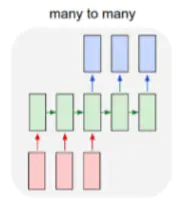

## Multivariate Multi-Step

Multivariate Multi-Step 是指：input 为多个序列，output 为多个时间步的问题。

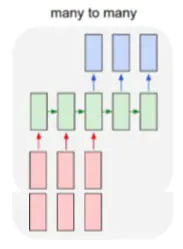

## Multiple Parallel Input & Multi-Step Output

Multiple Parallel Input & Multi-Step Output 是指：input 为多个序列，output 也是多个序列 & 多个时间步的问题。

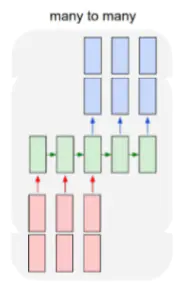

# LSTM销售预测（单变量）

In [3]:
import pandas as pd
import numpy as np  #数组模块；
from matplotlib import pyplot as plt   #绘图模块；
%matplotlib inline
from sklearn.metrics import mean_squared_error #均方根差，矩阵计算;

import os
os.environ['KERAS_BACKEND']='tensorflow'
#####

In [4]:
df = pd.read_csv('./order2019.csv',index_col=0,encoding='GBK')

def convert_time(df):
    df['Order_Date'] =pd.to_datetime(df['Order_Date'],format='%Y/%m/%d %H:%M:%S')
    df['Date'] = df.Order_Date.dt.date
    df['Date'] =pd.to_datetime(df['Date'],format='%Y/%m/%d %H:%M:%S')
    df['Month']=df.Order_Date.dt.month
    df['Time'] = df.Order_Date.dt.time 
    df['Hour'] = df.Order_Date.dt.hour
    print(df.head())

convert_time(df)


   Order_ID  Order_Type          Order_Date     User_ID     SKU_ID  \
0     96293           2 2019-01-01 00:01:00     1002915  P00117442   
1     31090           2 2019-01-01 12:12:00     1004746  P00117442   
2     87058           1 2019-01-01 16:48:00  4191287379  P00117442   
3    462034           2 2019-01-01 17:15:00     1005119  P00117442   
4    246885           2 2019-01-01 21:57:00     1002002  P00117442   

   Order_status  Pay_type   Pay_account  List_Price  Qty  Amount   Coupons  \
0             1         2  3.580000e+15         608    2  1070.08    100.0   
1             1         2  4.040000e+15         608    1   516.80     11.0   
2             1         2  2.710000e+15         608    2  1070.08    200.0   
3             1         3  3.470000e+14         608    1   535.04     12.0   
4             1         2  6.010000e+15         608    2  1118.72     22.0   

   Promotion  Purchase  Discount_member Discount_total       Date  Month  \
0  充1000免100    970.08            

## 数据准备

### 原始时间序列

In [5]:
dataframe=pd.pivot_table(df,index='Date',values='Purchase',aggfunc=np.sum)
dataset =dataframe.values
dataset = dataset.astype('float32')   # 将整型变为float
#df[df.Date == '2019-01-01'][['Purchase']].sum()

In [6]:
dataframe

,Purchase
Date,
2019-01-01,1189200.50
2019-01-02,1221917.22
2019-01-03,1280212.16
2019-01-04,1217679.94
2019-01-05,1267895.52
...,...
2019-12-27,1289460.60
2019-12-28,1295081.80
2019-12-29,1263069.10


### 数据标准化

In [7]:
from sklearn.preprocessing import StandardScaler   #数据标准化

scaler =StandardScaler()
dataset=scaler.fit_transform(dataset)

# 标准化数据MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 10))
#dataset = scaler.fit_transform(dataset)

### 划分训练集和测试集

In [8]:
#划分训练集和测试集
train_size = int(len(dataset) * 0.7) #训练数据
train, test = dataset[0: train_size, :], dataset[train_size: len(dataset), :]
print("训练数据:",train.shape)
print("测试数据:",test.shape)

训练数据: (255, 1)
测试数据: (110, 1)


### 输入输出结构及数据准备

（使用前两步预测后一步）
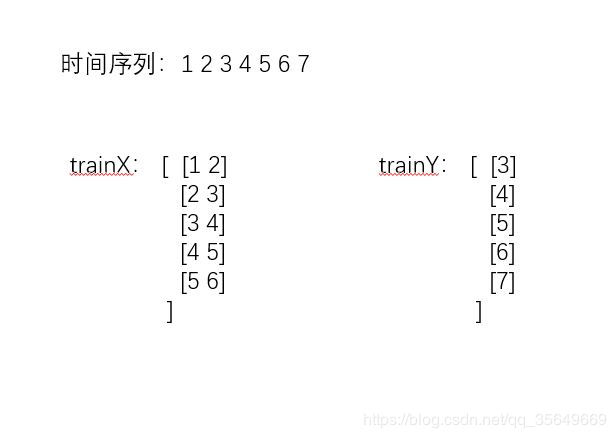


可以看到trainX的shape为 (5,2) trainY为(5,1)
在进行训练的过程中要将trainX reshape为 (5,2,1)  

(LSTM的输入为 [samples, timesteps, features]
这里的timesteps为步数，features为维度 这里我们的数据是1维的)


In [9]:
timesteps =1#每批过神经网络的大小;
n_steps=30 #步长为1，即用今天预测明天;

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - n_steps - 1):
        
        x = dataset[i:n_steps+i, 0]
        dataX.append(x)
        
        y = dataset[i+n_steps : i+n_steps+1, 0]
        dataY.append(y)
        
       # print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

# 创建dataset
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

print(X_train.shape[0],X_train.shape[1],y_train.shape)
print(X_test.shape,y_test.shape)

#LSTM 层输入格式: 为矩阵,矩阵内容 [ samples, timesteps, features ]
#samples:观测值
#timesteps:对于给定的观测值,给定变量有单独的时间步--就是时间窗口 
#features:在得到观测值的时刻,观测到的单独的


X_train = np.reshape(X_train, (X_train.shape[0],timesteps,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],timesteps,X_test.shape[1]))

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


224 30 (224, 1)
(79, 30) (79, 1)
(224, 1, 30) (224, 1)
(79, 1, 30) (79, 1)


In [10]:
X_train

array([[[-2.1080735 , -1.4303311 , -0.22272632, ..., -0.7908917 ,
         -0.16335322, -1.3197806 ]],

       [[-1.4303311 , -0.22272632, -1.5181077 , ..., -0.16335322,
         -1.3197806 , -3.0975888 ]],

       [[-0.22272632, -1.5181077 , -0.4778708 , ..., -1.3197806 ,
         -3.0975888 ,  0.3733842 ]],

       ...,

       [[ 0.94968295, -0.35882685,  1.0010365 , ..., -0.42737687,
          0.7290116 ,  0.10592179]],

       [[-0.35882685,  1.0010365 , -0.6054495 , ...,  0.7290116 ,
          0.10592179,  0.83717734]],

       [[ 1.0010365 , -0.6054495 , -0.8982729 , ...,  0.10592179,
          0.83717734,  1.3006545 ]]], dtype=float32)

In [ ]:
dataframe.head(50)

## 模型结构

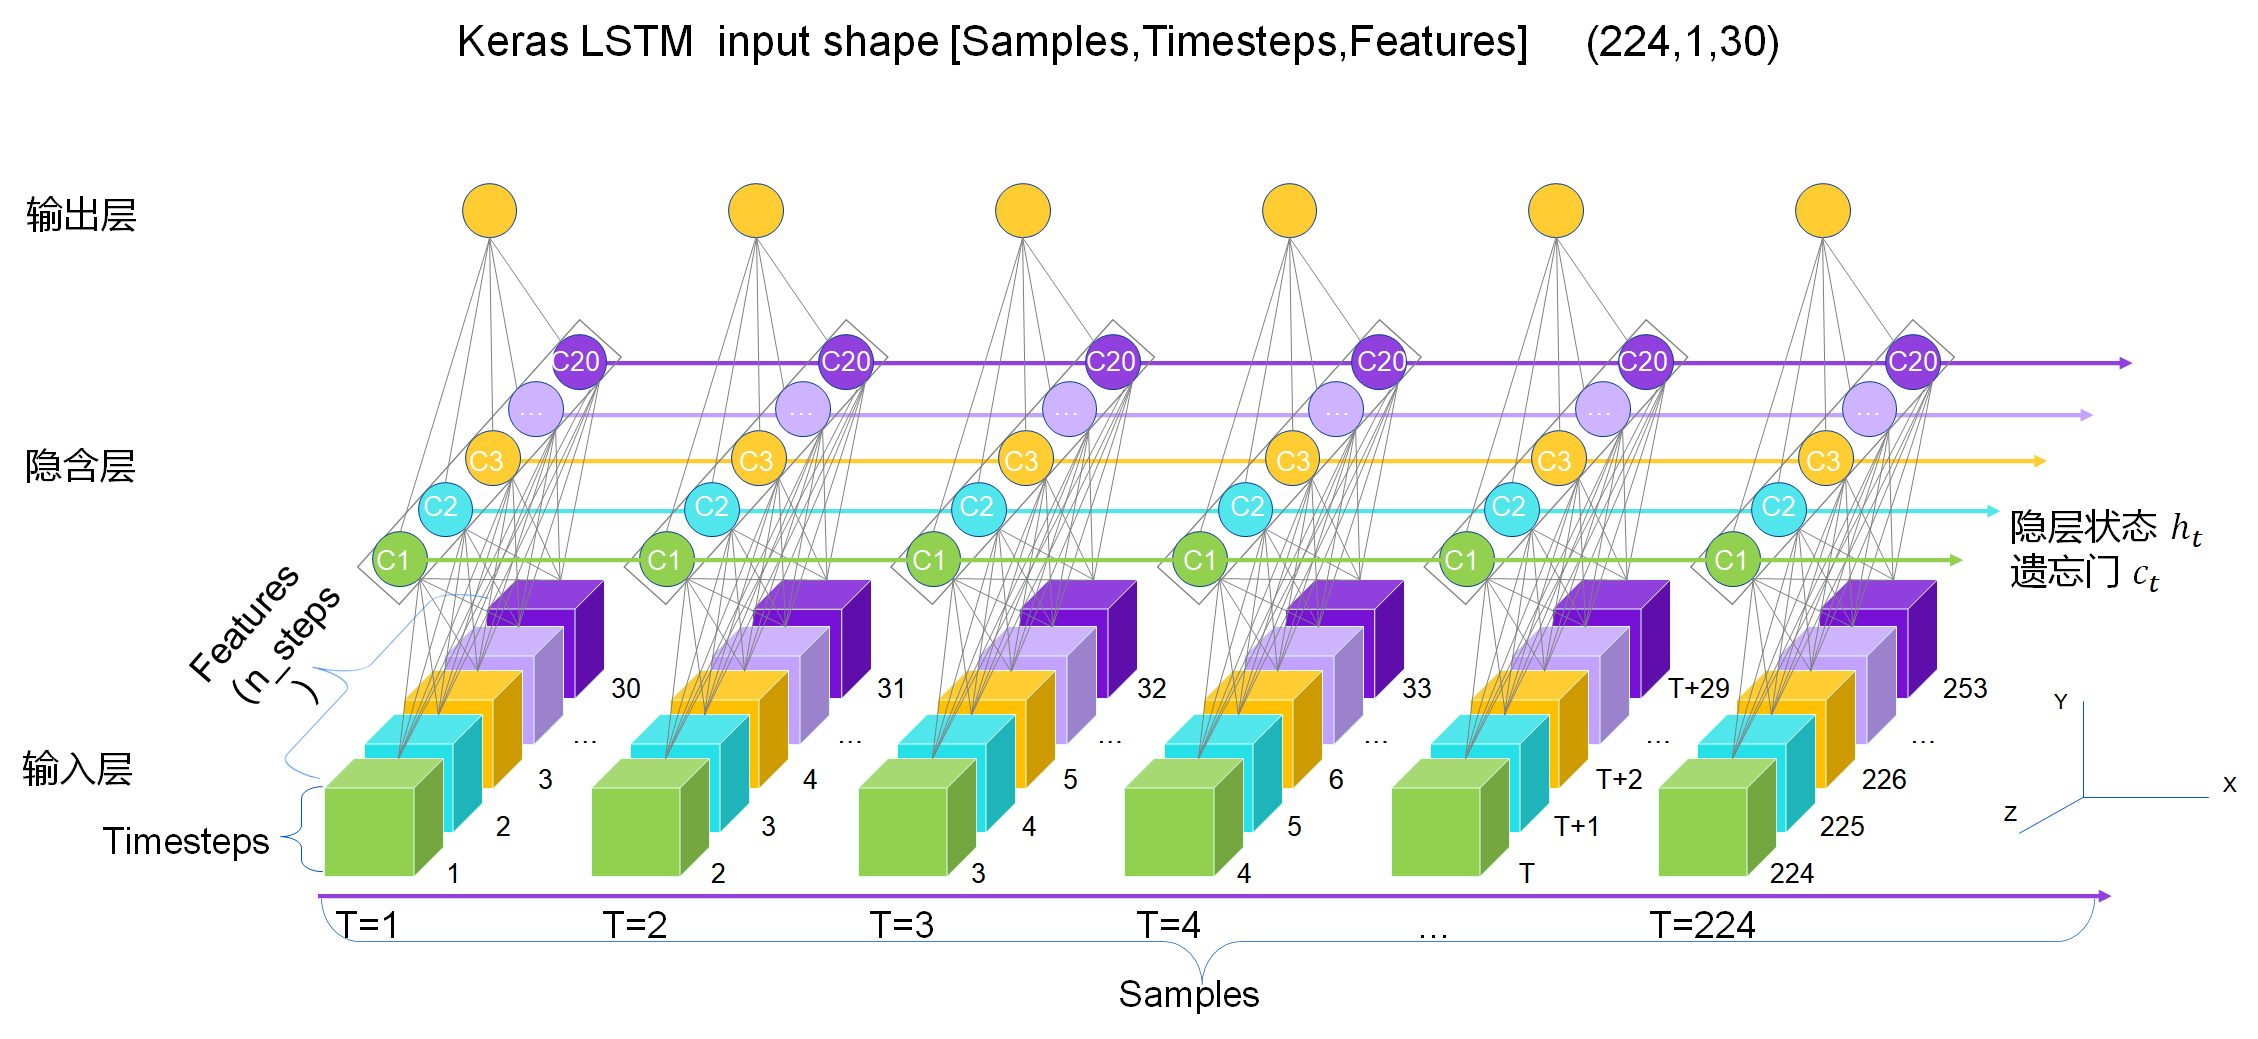

In [11]:
from keras.models import Sequential #引入Kears模块的序列模型，此模型是将所有层线性叠加；
from keras.layers import Dense #全连接层，输出的维度;
from keras.layers import LSTM #引入LSTM层;


epochs =100 #神经网络训练的轮次

def build_model():
    model = Sequential()
    model.add(LSTM(input_shape=(timesteps, n_steps),units=10, activation='relu',return_sequences=False))
    model.add(Dense(units=1)) #全连接层，输出的维度;
    model.compile(loss='mean_squared_error', optimizer='adam') #损失函数是均方差，优化器是采用adam;
       
    return model

# 训练模型
model = build_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=timesteps)

Epoch 1/100
224/224 [==============================] - 2s 2ms/step - loss: 0.9618
Epoch 2/100
224/224 [==============================] - 0s 2ms/step - loss: 0.9038A: 0s - loss: 
Epoch 3/100
224/224 [==============================] - 0s 2ms/step - loss: 0.8654
Epoch 4/100
224/224 [==============================] - 1s 2ms/step - loss: 0.8308
Epoch 5/100
224/224 [==============================] - 1s 3ms/step - loss: 0.7926
Epoch 6/100
224/224 [==============================] - 0s 2ms/step - loss: 0.7489
Epoch 7/100
224/224 [==============================] - 0s 2ms/step - loss: 0.6941
Epoch 8/100
224/224 [==============================] - 1s 2ms/step - loss: 0.6331
Epoch 9/100
224/224 [==============================] - 0s 2ms/step - loss: 0.5722
Epoch 10/100
224/224 [==============================] - 0s 2ms/step - loss: 0.5132
Epoch 11/100
224/224 [==============================] - 0s 2ms/step - loss: 0.4640
Epoch 12/100
224/224 [==============================] - 1s 2ms/step - loss: 0.4187

In [12]:
len(model.layers)

2

In [13]:
X_train.shape

(224, 1, 30)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1640      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [15]:
X_train 

array([[[-2.1080735 , -1.4303311 , -0.22272632, ..., -0.7908917 ,
         -0.16335322, -1.3197806 ]],

       [[-1.4303311 , -0.22272632, -1.5181077 , ..., -0.16335322,
         -1.3197806 , -3.0975888 ]],

       [[-0.22272632, -1.5181077 , -0.4778708 , ..., -1.3197806 ,
         -3.0975888 ,  0.3733842 ]],

       ...,

       [[ 0.94968295, -0.35882685,  1.0010365 , ..., -0.42737687,
          0.7290116 ,  0.10592179]],

       [[-0.35882685,  1.0010365 , -0.6054495 , ...,  0.7290116 ,
          0.10592179,  0.83717734]],

       [[ 1.0010365 , -0.6054495 , -0.8982729 , ...,  0.10592179,
          0.83717734,  1.3006545 ]]], dtype=float32)

In [16]:
print(y_train)

[[-3.0975888 ]
 [ 0.3733842 ]
 [ 0.17223972]
 [ 0.5128691 ]
 [ 0.19806412]
 [-0.23614216]
 [ 0.34720507]
 [-0.7538292 ]
 [ 0.20697436]
 [ 0.22563899]
 [ 0.749292  ]
 [ 0.4261931 ]
 [ 1.4937459 ]
 [ 1.1635727 ]
 [-0.5456647 ]
 [-0.516922  ]
 [-0.2396871 ]
 [ 0.19450884]
 [ 0.8165162 ]
 [-0.21317649]
 [ 0.13770966]
 [ 0.99795514]
 [ 0.6041699 ]
 [-0.15755808]
 [ 0.06505537]
 [-0.3187761 ]
 [ 0.18807669]
 [-0.890893  ]
 [-0.6700895 ]
 [-0.03433738]
 [ 0.16883203]
 [-0.8500421 ]
 [-1.1560353 ]
 [ 0.7606518 ]
 [ 0.02915031]
 [ 0.25847298]
 [-0.51593804]
 [-0.20577072]
 [-0.74990356]
 [ 0.21358778]
 [-0.07800038]
 [ 1.2979305 ]
 [ 0.0286868 ]
 [ 0.14518017]
 [ 2.0995798 ]
 [-1.1695987 ]
 [ 1.0275109 ]
 [ 0.4919776 ]
 [ 0.67022115]
 [-0.02368964]
 [ 0.6680797 ]
 [ 0.5062169 ]
 [ 0.86059093]
 [ 0.54981774]
 [ 0.18866967]
 [ 0.85296506]
 [ 0.36553046]
 [ 0.47961825]
 [-3.4593763 ]
 [-2.1137314 ]
 [-1.0026244 ]
 [-0.19535862]
 [-0.11279975]
 [-0.18861055]
 [-0.37666804]
 [ 0.9325875 ]
 [ 0.55219

## 模型预测与评估

In [17]:
# 模型预测数据
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

# 反标准化数据 --- 目的是保证MSE的准确性
predict_train= scaler.inverse_transform(predict_train)
y_train = scaler.inverse_transform(y_train)
predict_test = scaler.inverse_transform(predict_test)
y_test = scaler.inverse_transform(y_test)


# RMSE评估模型
train_score = np.sqrt(mean_squared_error(y_train, predict_train))
print('Train Score: %.2f RMSE' % train_score)
test_score = np.sqrt(mean_squared_error(y_test, predict_test))
print('Validatin Score: %.2f RMSE' % test_score)

Train Score: 4913.93 RMSE
Validatin Score: 80075.11 RMSE


In [18]:
from sklearn.metrics import mean_squared_error

print("MSE:",mean_squared_error(y_train, predict_train))
print("RMSE:",np.sqrt(mean_squared_error(y_train, predict_train)))


MSE: 24146704.0
RMSE: 4913.9297


## 数据可视化

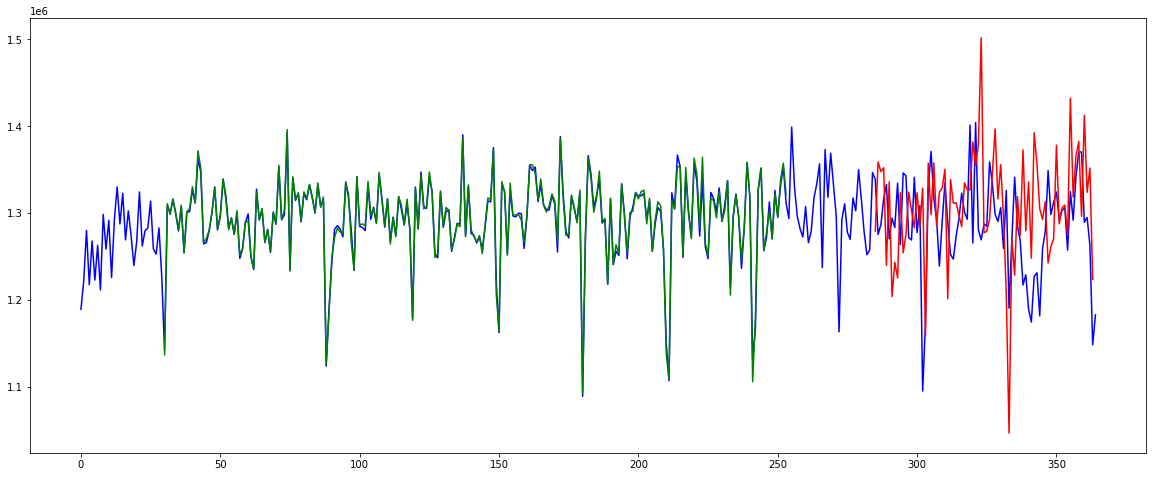

In [19]:

# 构建通过训练集进行预测的图表数据
predict_train_plot = np.empty_like(dataset)
predict_train_plot[:, :] = np.nan
predict_train_plot[n_steps:len(predict_train) + n_steps, :] = predict_train

# 构建通过评估数据集进行预测的图表数据
predict_validation_plot = np.empty_like(dataset)
predict_validation_plot[:, :] = np.nan
predict_validation_plot[len(predict_train) + n_steps * 2 + 1:len(dataset) - 1, :] = predict_test


# 图表显示
plt.figure(figsize=(20, 8))
dataset = scaler.inverse_transform(dataset)
plt.plot(dataset, color='blue')
plt.plot(predict_train_plot, color='green')
plt.plot(predict_validation_plot, color='red')
plt.savefig('./LSTM预测可视化.JPG')
plt.show()


# Multiple Input

In [ ]:

# 标准化数据MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 10))
#dataset = scaler.fit_transform(dataset)

scaler =StandardScaler()
dataset=scaler.fit_transform(dataset)


train_size = int(len(dataset) * 0.7) #训练数据
test = len(dataset) - train_size #测试数据
train, test = dataset[0: train_size, :], dataset[train_size: len(dataset), :]
print("训练数据:",train.shape)
print("测试数据:",test.shape)

In [ ]:

#n_steps_in` 为输入的 X 每次考虑几个时间步
#n_steps_out` 为输出的 y 每次考虑几个时间步 

n_steps_in, n_steps_out = 30,5

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - n_steps_in - n_steps_out):
        
        x = dataset[i: n_steps_in+i, 0]
        dataX.append(x)
        
        y = dataset[i+n_steps_in : i+n_steps_in+n_steps_out, 0]
        dataY.append(y)
        

    return np.array(dataX), np.array(dataY)


# 创建dataset，让数据产生相关性
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

print(X_train.shape[0],X_train.shape[1],y_train.shape[0],y_train.shape[1])
print(X_test.shape[0],X_test.shape[1],y_test.shape)


In [ ]:


batch_size =1# 每批过神经网络的输入序列
epochs =200 #神经网络训练的轮次

#units 是隐藏层4个，
#input_shape是LSTM 层输入格式: 为矩阵,矩阵内容 [ samples, timesteps, features ]
    #samples:观测值，timesteps:对于给定的观测值,给定变量有单独的时间步--就是时间窗口 
    #features:在得到观测值的时刻,观测到的单独的 
    #measures--就是列数(属性个数) ;

def build_model():
    model = Sequential()
    model.add(LSTM(units=100, activation='relu',return_sequences=True, input_shape=( batch_size ,n_steps_in)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_steps_out))
    model.compile(loss='mean_squared_error', optimizer='adam') #损失函数是均方差，优化器是采用adam;
    return model


# 将输入转化成为【sample，timesteps, feature]
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))


# 训练模型
model = build_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

### 模型预测与评估

In [ ]:

# 模型预测数据
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

# 反标准化数据 --- 目的是保证MSE的准确性
predict_train = scaler.inverse_transform(predict_train)
y_train = scaler.inverse_transform(y_train)
predict_test = scaler.inverse_transform(predict_test)
y_test = scaler.inverse_transform(y_test)


# 评估模型
train_score = math.sqrt(mean_squared_error(y_train, predict_train))
print('Train Score: %.2f RMSE' % train_score)
test_score = math.sqrt(mean_squared_error(y_test, predict_test))
print('Validatin Score: %.2f RMSE' % test_score)


In [ ]:
predict_test

In [ ]:
# 构建通过训练集进行预测的图表数据
predict_train_plot = np.empty_like(dataset)
predict_train_plot[:,:] = np.nan
predict_train_plot[n_steps_in:predict_train.shape[0]+n_steps_in,0:1] = predict_train[:,-0:1]

# 构建通过评估数据集进行预测的图表数据
predict_validation_plot = np.empty_like(dataset)
predict_validation_plot[:, :] = np.nan
predict_validation_plot[len(predict_train)+n_steps_in*2+n_steps_out:len(dataset) -n_steps_out, :] = predict_test[:,-0:1]


# 图表显示
plt.figure(figsize=(20, 8))
dataset = scaler.inverse_transform(dataset)
plt.plot(dataset, color='blue')
plt.plot(predict_train_plot, color='green')
plt.plot(predict_validation_plot, color='red')
plt.show()


## 思路

In [ ]:

# 标准化数据MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 10))
#dataset = scaler.fit_transform(dataset)

scaler =StandardScaler()
dataset=scaler.fit_transform(dataset)



train_size = int(len(dataset) * 0.6) #训练数据
test = len(dataset) - train_size #测试数据
train, test = dataset[0: train_size, :], dataset[train_size: len(dataset), :]
print("训练数据:",train.shape)
print("测试数据:",test.shape)


n_steps=30 #时间窗口，步长为1，即用今天预测明天;

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - n_steps - 1):
        
        x = dataset[i,0]
        dataX.append(x)
        
        y = dataset[i:i+n_steps+1, 0]
        dataY.append(y)
        
       # print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)


# 创建dataset，让数据产生相关性
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)
